In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23 00:00:00


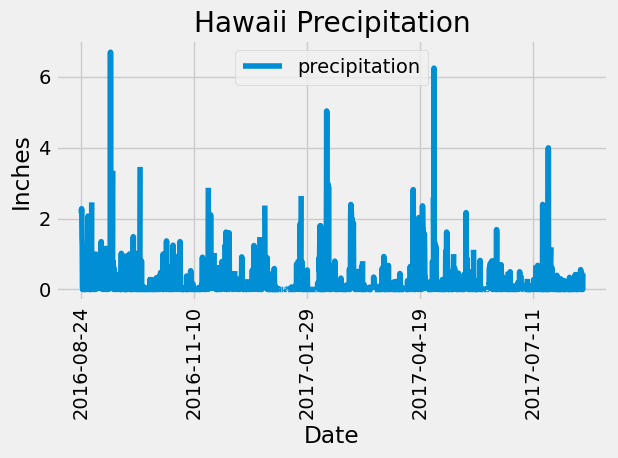

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# -- most recent data point is (2017-08-23) so..
most_recent_data = '2017-08-23'

# Calculate the date one year from the last date in data set.
# -- need to convert date string to datetime object so using strptime for this
one_year_ago = dt.datetime.strptime(most_recent_data, '%Y-%m-%d') - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
HI_prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
HI_prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
HI_prcp_df = pd.DataFrame(HI_prcp_query, columns=['date', 'precipitation'])
HI_prcp_df

# Sort the dataframe by date
HI_prcp_df = HI_prcp_df.sort_values('date')
HI_prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
HI_prcp_df.plot(x='date', y='precipitation', rot=90)

# Add legend, title, and axis labels
plt.legend()
plt.title('Hawaii Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.tight_layout()
plt.savefig("./Images/HI_prcp.png")

# Show the plot
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
HI_prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).first()[0]
station_count

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_list[0][0]
most_active_station

# using select to perform temperature calcalations
sel = [func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]

temp_calc = session.query(*sel).\
    filter(Measurement.station == most_active_station).all()

temp_calc


[(54.0, 85.0, 71.66378066378067)]

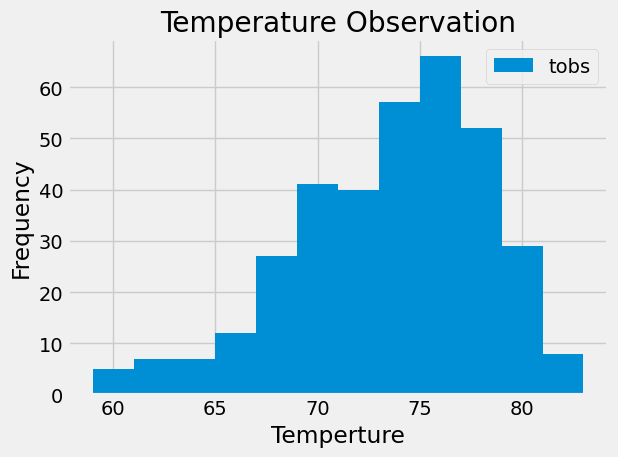

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_mo_temp_query = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

twelve_mo_temp_query

# create DataFrame for this station
temp_df = pd.DataFrame(twelve_mo_temp_query)
temp_df

# create histogram
temp_df.plot.hist(bins=12)

# Add title and axis labels
plt.title('Temperature Observation')
plt.xlabel('Temperture')
plt.tight_layout()
plt.savefig("./Images/12_mo_TOBS.png")

# Show the plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()